In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

In [3]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2)

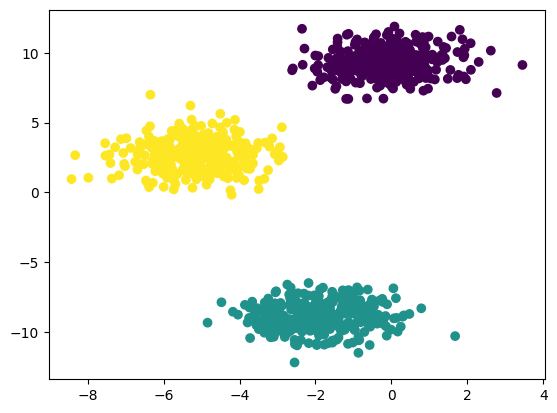

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.cluster import KMeans

In [14]:
# Elbow Method
wcss = [] # WCSS -> Within-Cluster Sum of Square
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1339.9999999999995,
 611.4620671768129,
 139.8064966817183,
 112.37918869320448,
 83.44570167296831,
 55.877867299278044,
 48.7099019059498,
 41.94847149078896,
 37.650730595663646,
 31.879686773503146]

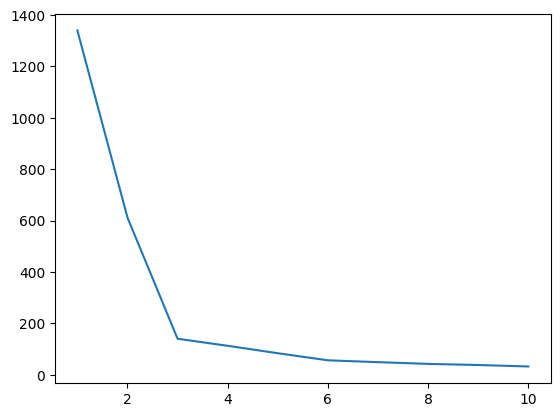

In [18]:
# Plt the Elbow Curve
plt.plot(range(1,11),wcss)

#### To find out the K values Using Another Techniques
* Knee Locator
* Silhoute Scoring

In [19]:
!pip install kneed

In [20]:
from kneed import KneeLocator

In [29]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [30]:
kl.elbow

np.int64(3)

In [31]:
## Silhate Scaling
from sklearn.metrics import silhouette_score

In [32]:
silhate = []
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,kmeans.labels_)
    silhate.append(score)
    

In [33]:
silhate

[np.float64(0.5079230703383959),
 np.float64(0.7443341369788994),
 np.float64(0.6370673076212597),
 np.float64(0.559834247689453),
 np.float64(0.4878919861189639),
 np.float64(0.4633577878851648),
 np.float64(0.4483014207386016),
 np.float64(0.42811316444098485),
 np.float64(0.4032867438872845)]

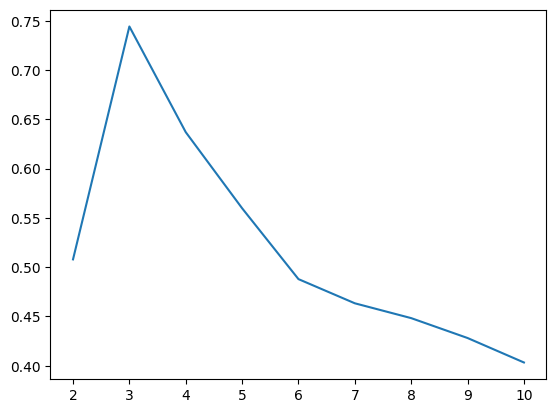

In [38]:
plt.plot(range(2,11),silhate)

# In this Graph Which value is Higher That is the K Value Below the graph 3 is the K Value